In [1]:
import numpy as np
import pandas as pd

In [4]:
data ="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [5]:
!wget $data

--2023-10-03 20:50:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-10-03 20:50:17 ERROR 404: Not Found.



In [20]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [25]:
categorical_columns=list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_columns:
    df[c]=df[c].str.lower().str.replace(' ','_')

In [26]:
df.totalcharges=df.totalcharges.fillna(0)

In [27]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')

In [28]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [29]:
df.churn=(df.churn=='yes').astype('int')

In [30]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [31]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
y_train=df_train.churn
y_val=df_val.churn
y_test=df_test.churn

In [32]:
del(df_train['churn'])
del(df_val['churn'])
del(df_test['churn'])

In [33]:
churn_rate=df_train_full.churn.mean()

In [34]:
churn_rate

0.26996805111821087

In [35]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [37]:
numerical=['tenure','monthlycharges','totalcharges']
categorical_columns=['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod' ]

In [39]:
dv=DictVectorizer(sparse=False)
dict_train=df_train[categorical_columns+numerical].to_dict(orient='records')
dict_val=df_val[categorical_columns+numerical].to_dict(orient='records')
x_train=dv.fit_transform(dict_train)
x_val=dv.fit_transform(dict_val)


In [40]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred=model.predict_proba(x_val)[:,1]
churn_decision=(y_pred>=0.5)
(y_val==churn_decision).mean()

0.8055358410220014

# 4.2 Accuracy and dummy model

In [49]:
threshold=np.linspace(0,1,101)
score=[]

In [50]:
for t in threshold:
    churn_decision=(y_pred>=t)
    acc=(y_val==churn_decision).mean()
    score.append(acc)
    print(acc,' ',t)

0.2739531582682754   0.0
0.3598296664300923   0.01
0.42441447835344215   0.02
0.4627395315826828   0.03
0.49041873669268987   0.04
0.5081618168914124   0.05
0.5280340667139816   0.06
0.5457771469127041   0.07
0.5656493967352733   0.08
0.5869410929737402   0.09
0.6053938963804116   0.1
0.6167494677075941   0.11
0.631653655074521   0.12
0.6373314407381121   0.13
0.6529453513129879   0.14
0.6635911994322214   0.15
0.6692689850958127   0.16
0.680624556422995   0.17
0.6898509581263307   0.18
0.6990773598296665   0.19
0.7047551454932577   0.2
0.7125621007806955   0.21
0.7196593328601846   0.22
0.730305180979418   0.23
0.7345635202271115   0.24
0.7381121362668559   0.25
0.7437899219304471   0.26
0.751596877217885   0.27
0.7551454932576295   0.28
0.7558552164655784   0.29
0.759403832505323   0.3
0.7629524485450674   0.31
0.759403832505323   0.32
0.7615330021291696   0.33
0.7636621717530163   0.34
0.7665010645848119   0.35000000000000003
0.7721788502484032   0.36
0.7743080198722498   0.37
0.777

<function matplotlib.pyplot.show(*args, **kw)>

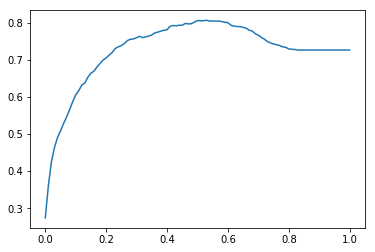

In [55]:
import matplotlib.pyplot as plt
plt.plot(threshold,score)
plt.show

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_val,churn_decision)

0.7260468417317246

In [60]:
for t in threshold:
    churn_decision=(y_pred>=t)
    acc=accuracy_score(y_val,churn_decision)
    score.append(acc)
    print(acc,' ',t)

0.2739531582682754   0.0
0.3598296664300923   0.01
0.42441447835344215   0.02
0.4627395315826828   0.03
0.49041873669268987   0.04
0.5081618168914124   0.05
0.5280340667139816   0.06
0.5457771469127041   0.07
0.5656493967352733   0.08
0.5869410929737402   0.09
0.6053938963804116   0.1
0.6167494677075941   0.11
0.631653655074521   0.12
0.6373314407381121   0.13
0.6529453513129879   0.14
0.6635911994322214   0.15
0.6692689850958127   0.16
0.680624556422995   0.17
0.6898509581263307   0.18
0.6990773598296665   0.19
0.7047551454932577   0.2
0.7125621007806955   0.21
0.7196593328601846   0.22
0.730305180979418   0.23
0.7345635202271115   0.24
0.7381121362668559   0.25
0.7437899219304471   0.26
0.751596877217885   0.27
0.7551454932576295   0.28
0.7558552164655784   0.29
0.759403832505323   0.3
0.7629524485450674   0.31
0.759403832505323   0.32
0.7615330021291696   0.33
0.7636621717530163   0.34
0.7665010645848119   0.35000000000000003
0.7721788502484032   0.36
0.7743080198722498   0.37
0.777

In [61]:
from collections import Counter

In [63]:
Counter(y_pred>=1)

Counter({False: 1409})

# 4.3 Confusion Table

In [77]:
tp=(y_pred>=0.5)&(y_val==1)
tn=(y_pred<0.5)&(y_val==0)
fp=(y_pred>=0.5)&(y_val==0)
fn=(y_pred<0.5)&(y_val==1)

In [79]:
tp.sum(),tn.sum(),fp.sum(),fn.sum()

(212, 923, 100, 174)

In [76]:
len(tp)

1409

In [85]:
confusion_matrix=np.array([[tn.sum(),fp.sum()],[fn.sum(),tp.sum()]])

In [86]:
confusion_matrix

array([[923, 100],
       [174, 212]], dtype=int64)

In [88]:
174/1409

0.12349183818310859

In [91]:
(confusion_matrix/confusion_matrix.sum()).round(3)

array([[0.655, 0.071],
       [0.123, 0.15 ]])

In [92]:
 precision=tp.sum()/(tp.sum()+fp.sum())

In [93]:
precision

0.6794871794871795

In [94]:
recall=tp.sum()/(tp.sum()+fn.sum())

In [95]:
recall

0.5492227979274611

# 4.5 ROC Curves

In [96]:
tpr=tp.sum()/(tp.sum()+fn.sum())
fpr=fp.sum()/(fp.sum()+tn.sum())

In [97]:
tpr,fpr

(0.5492227979274611, 0.09775171065493646)

In [143]:
scores=[]
for t in threshold:
    tp=((y_pred>=t)&(y_val==1)).sum()
    tn=((y_pred<t)&(y_val==0)).sum()
    fp=((y_pred>=t)&(y_val==0)).sum()
    fn=((y_pred<t)&(y_val==1)).sum()
    confusion_matrix=np.array([[tn,fp],[fn,tp]])  
    precision=tp.sum()/(tp.sum()+fp.sum())
    recall=tp/(tp+fn)  
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    scores.append((t,tp,fp,tn,fn,precision,recall,tpr,fpr))

C:\Users\0\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [108]:
scores

[(0.0, 386, 1023, 0, 0, 0.2739531582682754, 1.0, 1.0, 1.0),
 (0.01,
  385,
  901,
  122,
  1,
  0.29937791601866254,
  0.9974093264248705,
  0.9974093264248705,
  0.8807429130009775),
 (0.02,
  383,
  808,
  215,
  3,
  0.32157850545759864,
  0.9922279792746114,
  0.9922279792746114,
  0.7898338220918866),
 (0.03,
  382,
  753,
  270,
  4,
  0.3365638766519824,
  0.9896373056994818,
  0.9896373056994818,
  0.7360703812316716),
 (0.04,
  382,
  714,
  309,
  4,
  0.34854014598540145,
  0.9896373056994818,
  0.9896373056994818,
  0.6979472140762464),
 (0.05,
  379,
  686,
  337,
  7,
  0.355868544600939,
  0.9818652849740933,
  0.9818652849740933,
  0.6705767350928641),
 (0.06,
  377,
  656,
  367,
  9,
  0.3649564375605034,
  0.9766839378238342,
  0.9766839378238342,
  0.6412512218963832),
 (0.07,
  375,
  629,
  394,
  11,
  0.37350597609561753,
  0.9715025906735751,
  0.9715025906735751,
  0.6148582600195504),
 (0.08,
  370,
  596,
  427,
  16,
  0.3830227743271222,
  0.95854922279792

In [144]:
cols=['threshold','tp','fp','tn','fn','precision','recall','tpr','fpr']
df=pd.DataFrame(scores,columns=cols)

In [145]:
df.head()

,threshold,tp,fp,tn,fn,precision,recall,tpr,fpr
0,0.00,386,1023,0,0,0.273953,1.000000,1.000000,1.000000
1,0.01,385,901,122,1,0.299378,0.997409,0.997409,0.880743
2,0.02,383,808,215,3,0.321579,0.992228,0.992228,0.789834
3,0.03,382,753,270,4,0.336564,0.989637,0.989637,0.736070
4,0.04,382,714,309,4,0.348540,0.989637,0.989637,0.697947


In [114]:
df[::10]

,threshold,tp,fp,tn,fn,precision,recall,tpr,fpr
0,0.0,386,1023,0,0,0.273953,1.000000,1.000000,1.000000
10,0.1,367,537,486,19,0.405973,0.950777,0.950777,0.524927
20,0.2,337,367,656,49,0.478693,0.873057,0.873057,0.358749
30,0.3,292,245,778,94,0.543762,0.756477,0.756477,0.239492
40,0.4,252,175,848,134,0.590164,0.652850,0.652850,0.171065
50,0.5,212,100,923,174,0.679487,0.549223,0.549223,0.097752
60,0.6,155,51,972,231,0.752427,0.401554,0.401554,0.049853
70,0.7,69,13,1010,317,0.841463,0.178756,0.178756,0.012708
80,0.8,4,0,1023,382,1.000000,0.010363,0.010363,0.000000
90,0.9,0,0,1023,386,NaN,0.000000,0.000000,0.000000


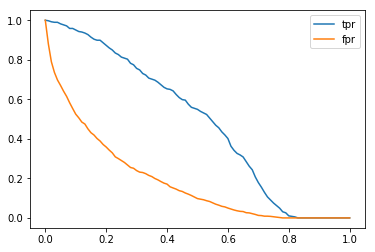

In [146]:
plt.plot(df.threshold,df.tpr,label='tpr')
plt.plot(df.threshold,df.fpr,label='fpr')
plt.legend()

In [118]:
#ideal model

In [119]:
num_neg=(y_val==0).sum()
num_pos=(y_val==1).sum()
num_neg,num_pos

(1023, 386)

In [121]:
y_ideal=np.repeat([0,1],[num_neg,num_pos])
y_ideal_pred=np.linspace(0,1,len(y_val))

In [123]:
((y_ideal_pred>=0.726)==y_ideal).mean()

1.0

In [124]:
1-y_val.mean()

0.7260468417317246

In [125]:
def tpr_fpr(y_val,y_pred):
    
    scores=[]
    threshold=np.linspace(0,1,101)
    for t in threshold:
        tp=((y_pred>=t)&(y_val==1)).sum()
        tn=((y_pred<t)&(y_val==0)).sum()
        fp=((y_pred>=t)&(y_val==0)).sum()
        fn=((y_pred<t)&(y_val==1)).sum()
        precision=tp/(tp+fP)
        recall=tp/(tp+fn)  
        tpr=tp/(tp+fn)
        fpr=fp/(fp+tn)
        scores.append((t,tp,fp,tn,fn,precision,recall,tpr,fpr))
    cols=['threshold','tp','fp','tn','fn','precision','recall','tpr','fpr']
    df=pd.DataFrame(scores,columns=cols) 
    return df

In [139]:
df_ideal=tpr_fpr(y_ideal,y_ideal_pred)

In [140]:
df_ideal.head()

,threshold,tp,fp,tn,fn,precision,recall,tpr,fpr
0,0.00,386,1023,0,0,0 1.000000 1 1.000000 2 1.00...,1.0,1.0,1.000000
1,0.01,386,1008,15,0,0 1.000000 1 1.000000 2 1.00...,1.0,1.0,0.985337
2,0.02,386,994,29,0,0 1.000000 1 1.000000 2 1.00...,1.0,1.0,0.971652
3,0.03,386,980,43,0,0 1.000000 1 1.000000 2 1.00...,1.0,1.0,0.957967
4,0.04,386,966,57,0,0 1.000000 1 1.000000 2 1.00...,1.0,1.0,0.944282


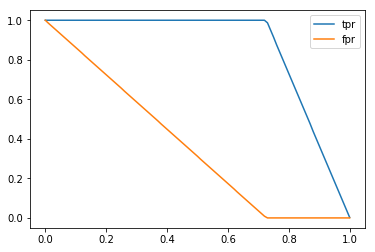

In [141]:
plt.plot(df_ideal.threshold,df.tpr,label='tpr')
plt.plot(df_ideal.threshold,df.fpr,label='fpr')
plt.legend()

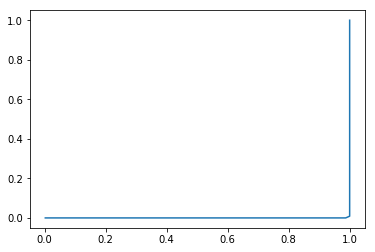

In [142]:
plt.plot(df.tpr,df.fpr)


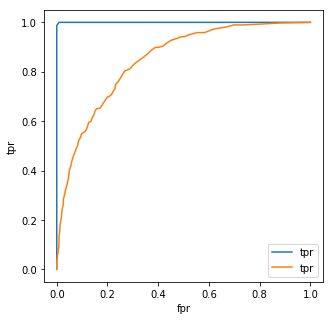

In [151]:
plt.figure(figsize=(5,5))
plt.plot(df_ideal.fpr,df_ideal.tpr)
plt.plot(df.fpr,df.tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

# 4.6 AUC

In [156]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [155]:
auc(df.fpr,df.tpr)

0.8463208889834327

In [158]:
fpr,tpr,threshold=roc_curve(y_val,y_pred)
auc(fpr,tpr)

0.8465956573929162

In [159]:
from sklearn.metrics import roc_auc_score

In [160]:
roc_auc_score(y_val,y_pred)

0.8465956573929162

In [162]:
#what actually AUC does
pos=y_pred[y_val==1]
neg=y_pred[y_val==0]
import random

In [166]:
n=100000
success=0
for i in range(n):
    pos_ind=random.randint(0,len(pos)-1)
    neg_ind=random.randint(0,len(neg)-1)
    if pos[pos_ind]>neg[neg_ind]:
        success+=1
success/n

0.8466931

In [167]:
n=100000
np.random.seed(1)
pos_index=np.random.randint(0,len(pos),size=n)  #len(pos) is not inclusive
neg_index=np.random.randint(0,len(neg),size=n)
(pos[pos_index]>neg[neg_index]).mean()

0.84533

# 4.7 Cross _Validation 

In [168]:
from sklearn.model_selection import KFold

In [189]:
def train(df,y,c):
    dictt=df[categorical_columns+numerical].to_dict(orient='record')
    dv=DictVectorizer(sparse=False)
    x_train=dv.fit_transform(dictt)
    model=LogisticRegression(C=c,max_iter=1000)
    model.fit(x_train,y)
    return dv,model

In [190]:
def predict(df,y,dv):
    dictt=df[categorical_columns+numerical].to_dict(orient='record')
    x_val=dv.fit_transform(dictt)
    y_pred=model.predict_proba(x_val)[:,1]
    return y_pred
    

In [191]:
dv,model=train(df_train,y_train)

TypeError: train() missing 1 required positional argument: 'c'

In [175]:
y_pred=predict(df_val,y_val,dv)

In [176]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)

In [177]:
kfold.split(df_train_full)

<generator object _BaseKFold.split at 0x00000299E1F44F10>

In [178]:
next(kfold.split(df_train_full))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [179]:
train_indx,val_indx=next(kfold.split(df_train_full))

In [180]:
len(train_indx)

5070

In [181]:
df_train=df_train_full.iloc[train_indx]
df_val=df_train_full.iloc[val_indx]

In [182]:
!pip install tqdm

mysql-connector-python 8.0.27 requires protobuf>=3.0.0, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
Cache entry deserialization failed, entry ignored
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [186]:
from tqdm.auto import tqdm

In [194]:
C=[0.001,0.01,0.1,1,10]
for c in C:
    
    scores=[]
    for train_indx,val_indx in tqdm(kfold.split(df_train_full)):
        df_train=df_train_full.iloc[train_indx]
        df_val=df_train_full.iloc[val_indx]
        y_train=df_train.churn.values
        y_val=df_val.churn.values
        dv,model=train(df_train,y_train,c)
        y_pred=predict(df_val,y_val,dv)
        auc=roc_auc_score(y_val,y_pred)
        scores.append(auc)
    scores=np.array(scores)
    scores.mean()
    print('%s   %.3f   %.3f' %(c,scores.mean(),scores.std()))

0it [00:00, ?it/s]

0.001   0.826   0.016


0it [00:00, ?it/s]

0.01   0.840   0.012


0it [00:00, ?it/s]

0.1   0.842   0.012


0it [00:00, ?it/s]

1   0.842   0.012


0it [00:00, ?it/s]

10   0.842   0.012


In [188]:
scores.std()

0.01227361869311348

In [195]:
#first we trained model in train func without C prameter(regularisation) and then wit different C's

In [196]:
#final model

dv,model=train(df_train_full,df_train_full.churn.values,0.1)
y_pred=predict(df_test,y_test,dv)
auc=roc_auc_score(y_test,y_pred)

In [199]:
auc

0.857801954347991